In [4]:
import notebookPlotting 
import pandas as pd
import dataAgglomeration as datglom 
import notebookPlotting
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
rcParams['font.size'] = 8
rcParams["figure.dpi"] = 200

#------------------------------------------------------------

def plot_Trinh1982(df,df_ref,tau_min,tau_max,R1,name): 
    
    plt.xlabel(r"$t$ [s]")
    plt.ylabel("$s_x$ [mm]")
    resolutions = list(df.index.levels[0])
    
    # Simulation data
    for res in resolutions:
        if res == 384:
            continue
        values = df.loc[res]["semi-axes-x"].values*1000.0
        plt.plot(df.loc[res]["time"], values, label=res)
        
    #Reference data
    time_ref = [x/1000.0 for x in range(1501)]
    R0=6.2
    a0 = R1 - R0
    upper_limit_low = []
    upper_limit_high = []

    for t in time_ref:
        upper_limit_low.append(R0 + a0*np.exp(tau_max*t))
        upper_limit_high.append(R0 + a0*np.exp(tau_min*t))

    plt.fill_between(time_ref, upper_limit_low, upper_limit_high, facecolor='lightgrey')
    plt.plot(df_ref["time"], R0+a0*df_ref["relative_amplitude"], label='exp. ',
                 marker='o', linestyle='None', color='black', markersize=3)

    plt.xlim(0.0, 1.4)
    plt.ylim(4, 9.5)
    plt.grid(c='gainsboro')
    plt.legend()
    plt.title(r'$%s$'%name)
    plt.show()

In [5]:
df_ref_lw147 = pd.read_csv("reference_data/trinh1982_figure10_lw147.csv", comment="#")
df_ref_lw180 = pd.read_csv("reference_data/trinh1982_figure10_lw180.csv", comment="#")

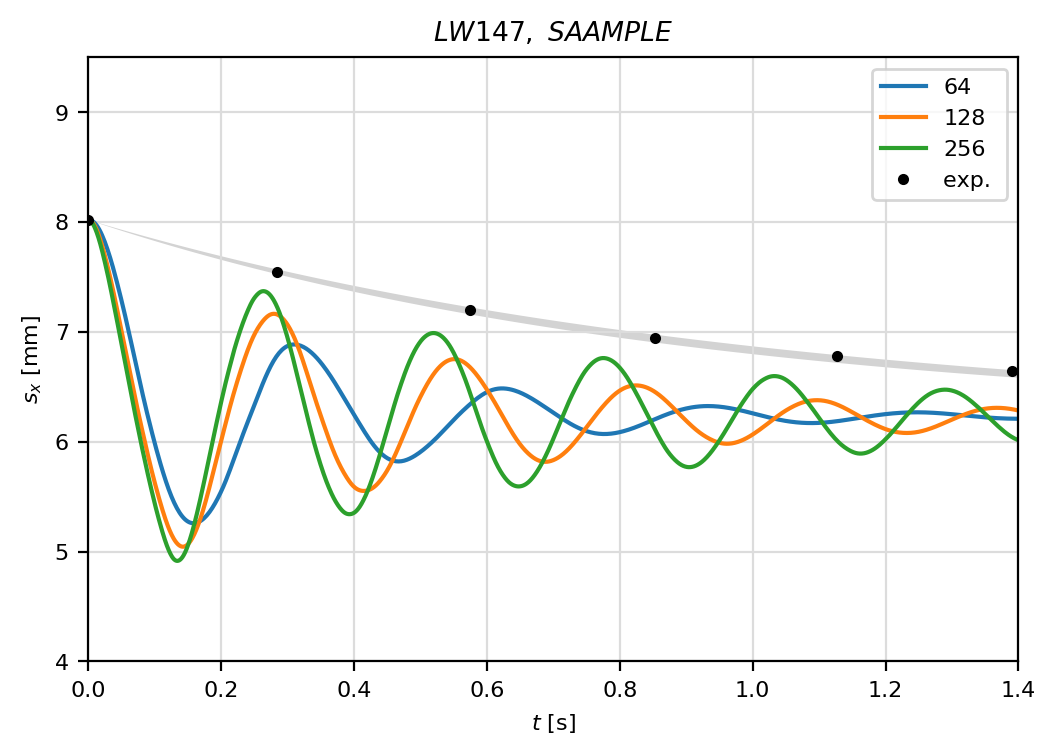

In [6]:
df_lw147_saample = pd.read_csv('reference_data/trinh1982fig10lw147.csv', comment='#',index_col=['resolution','step'])
plot_Trinh1982(df_lw147_saample,df_ref_lw147,-1.0,-1.113,8.02,'LW147,\ SAAMPLE')

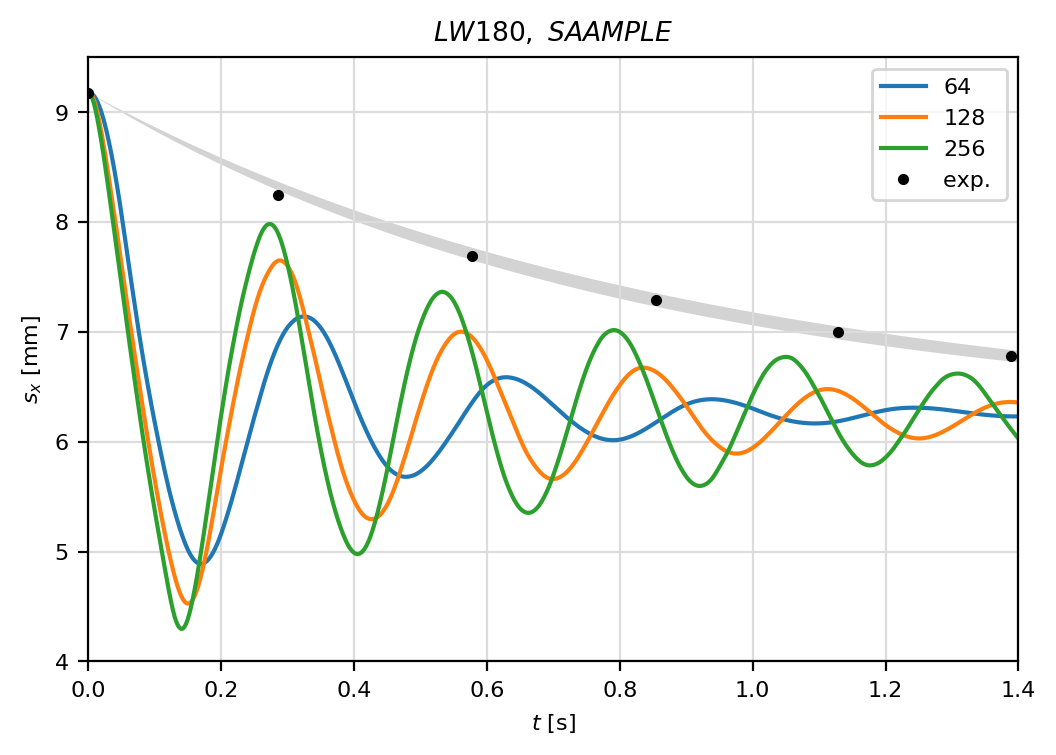

In [7]:
df_lw180_saample = pd.read_csv('reference_data/trinh1982fig10lw180.csv', comment='#',index_col=['resolution','step'])
plot_Trinh1982(df_lw180_saample,df_ref_lw180,-1.112,-1.242,9.1795,'LW180,\ SAAMPLE')

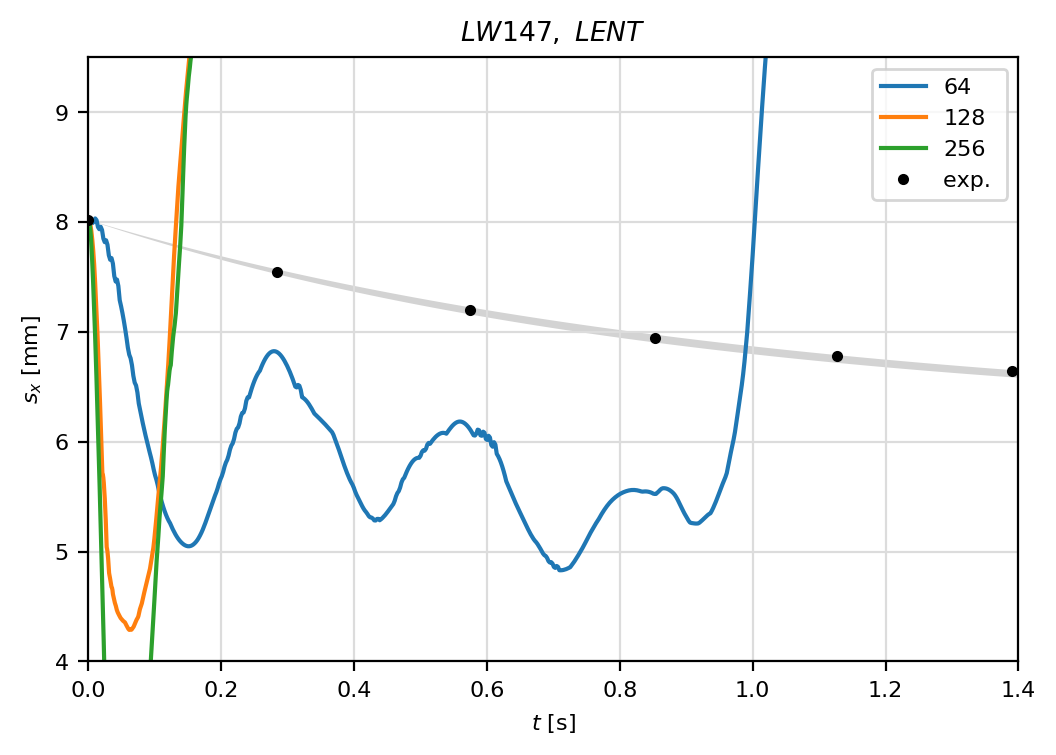

In [8]:
study_name_lw147 = "trinh1982fig10lw147.parameter"
case_0_name_lw147 = study_name_lw147 + "_00000_template_copy_hexrefined"
df_lw147_lent = datglom.data_agglomerator(study_name_lw147, case_0_name_lw147,"oscillatingDropletResults.csv").study_dataframe()
plot_Trinh1982(df_lw147_lent,df_ref_lw147,-1.0,-1.113,8.02,'LW147,\ LENT')

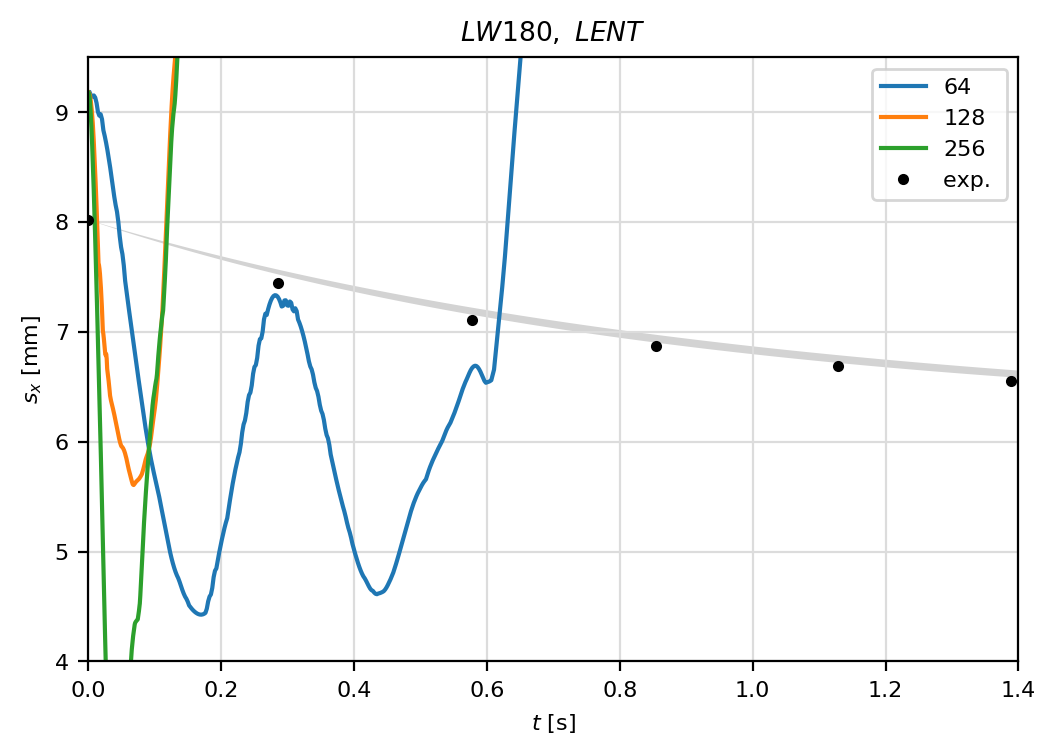

In [9]:
study_name_lw180 = "trinh1982fig10lw180.parameter"
case_0_name_lw180 = study_name_lw180 + "_00000_template_copy_hexrefined"
df_lw180_lent = datglom.data_agglomerator(study_name_lw180, case_0_name_lw180,"oscillatingDropletResults.csv").study_dataframe()
plot_Trinh1982(df_lw180_lent,df_ref_lw180,-1.0,-1.113,8.02,'LW180,\ LENT')